## Assignment- Advanced Regression_ House Price_prediction


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.

 

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house

2. How well those variables describe the price of a house

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Data Understanding


In [5]:
#importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# reading the dataset
house = pd.read_csv("train.csv")

In [7]:
# head
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [8]:
#checking duplicates
sum(house.duplicated(subset = 'Id')) == 0

True

In [9]:
#other atributes of the dataframe
house.describe()   

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Data Exploration

In [10]:
#checking the shape of dataframe
house.shape

(1460, 81)

In [11]:
# summary of the dataset: 1460 rows, 81 columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
# Checking for percentage nulls
round(100*(house.isnull().sum()/len(house.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [13]:
# since, it is clear that there are multiple columns with high nulls, lets group them together
house.columns[house.isnull().any()] 

null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
### Hence, we will first impute these categorical variables with 'None'

## Data Cleaning

In [14]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    house[i].fillna("none", inplace=True)

In [15]:
# Check nulls once again

house.columns[house.isnull().any()] 

null_2 = house.isnull().sum()/len(house)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [16]:
# Will check these remaining columns one by one
house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
house['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [19]:
house['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [20]:
house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
# As per the data dictionary "LotFrontage" is Linear feet of street connected to property.  
# Since it is a numeric with a fair distribution, it can be imputed with similar 'Neighborhood' values
# in case of Electrical column replacing the null values with maximum occuring value
house['LotFrontage'].fillna(house['LotFrontage'].median(), inplace=True)
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["Electrical"].fillna("SBrkr", inplace=True)

In [22]:
# Check nulls once again

house.columns[house.isnull().any()] 

null_2 = house.isnull().sum()/len(house)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

Series([], dtype: float64)

### There are no null values in the data

In [23]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [24]:
# Dropping ID Column
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

## Data Visualization

#### Target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

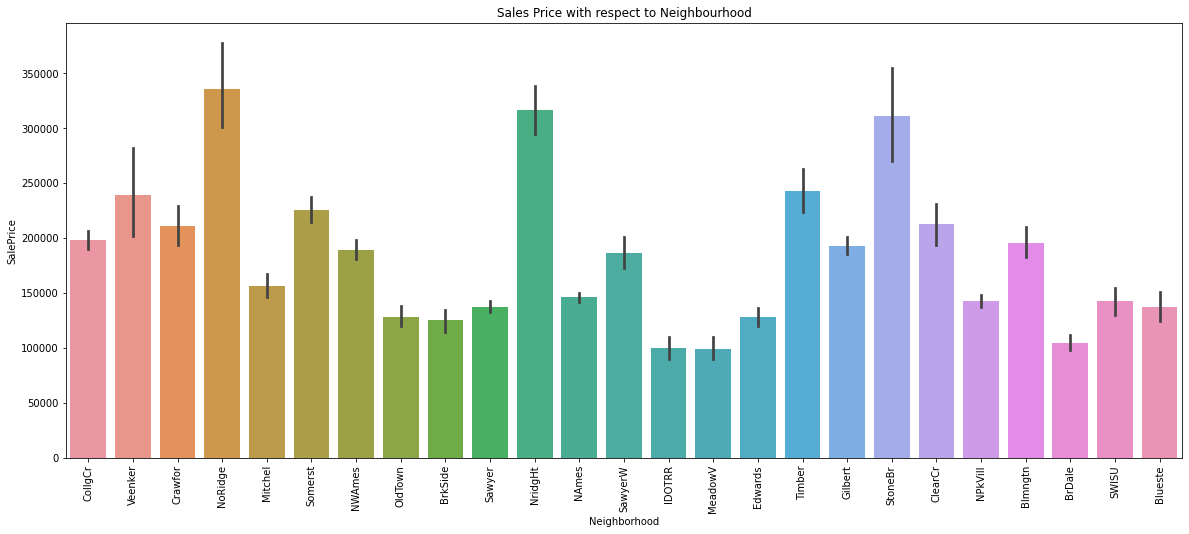

In [25]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### Properties in some of the Neighborhoods are high priced.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

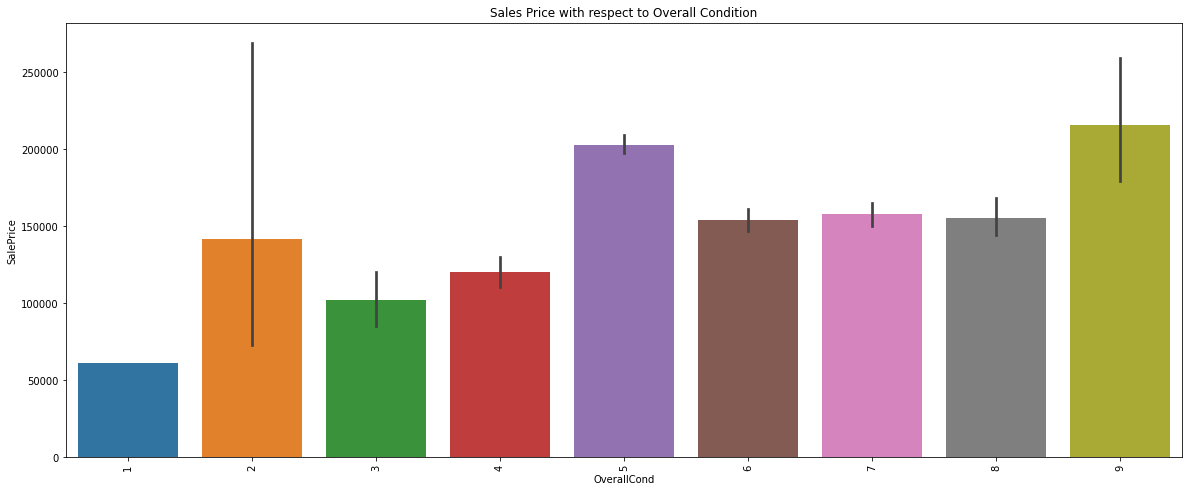

In [26]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

#### The price of the houses increases as we move from the very poor conditions to very excellent
      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

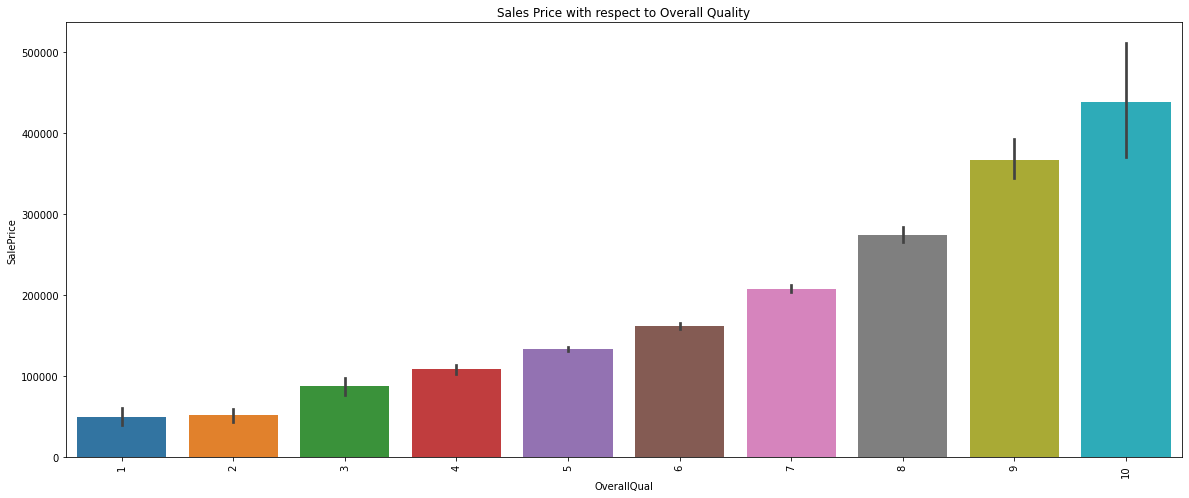

In [27]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= house)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### The price of the houses increase as we move from very poor to very excellent overall quality
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

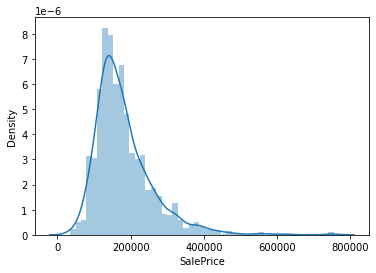

In [28]:
sns.distplot(house['SalePrice'])

In [29]:
house_raw = house.copy

### Since the Saleprice figures are skewed towards left, we will apply the log transformation to obtain a centralized data

In [30]:
#Log Transformation
house['SalePrice']=np.log1p(house['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

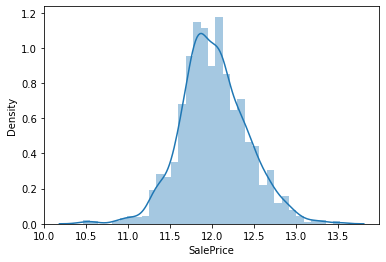

In [31]:
sns.distplot(house['SalePrice'])

### Now the distribution looks symmetric

### Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

In [32]:
# dropping the columns we want to treat as categorical variables
house_numeric = house_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
house_numeric.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  
0        0     208500  
1        0     181500  
2        0     223500  
3        0     140000  
4        0     250000

### Outlier detection and treatment

In [33]:
house_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     69.863699   10516.828082   103.117123   443.639726    46.549315   
std      22.027677    9981.264932   180.731373   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      60.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      79.000000   11601.500000   164.250000   712.250000     0.000000   
90%      92.000000   14381.700000   335.000000  1065.500000   117.200000   
95%     104.000000   17401.150000   456.000000  1274.000000   396.200000   
99%     137.410000   37567.640000   791.280000  1572.410000   830.380000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
90%    1232.000000  1602.200000  1680.000000   954.200000      0.000000   
95%    1468.000000  1753.000000  1831.250000  1141.050000      0.000000   
99%    1797.050000  2155.050000  2219.460000  1418.920000    360.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
90%    2158.300000   757.100000   262.000000   130.000000     112.000000   
95%    2466.100000   850.100000   335.000000   175.050000     180.150000   
99%    3123.480000  1002.790000   505.460000   285.820000     261.050000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
90%       0.000000     0.000000     0.000000      0.000000  278000.000000  
95%       0.000000   160.000000     0.000000      0.000000  326100.000000  
99%     168.000000   268.050000     0.000000    700.000000  442567.010000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000

(1453, 81)

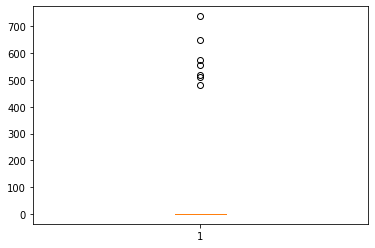

In [34]:
# outlier treatment
plt.boxplot(house['PoolArea'])
Q1 = house['PoolArea'].quantile(0.25)
Q3 = house['PoolArea'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['PoolArea'] >= Q1 - 1.5*IQR) & 
                      (house['PoolArea'] <= Q3 + 1.5*IQR)]
house.shape

(1402, 81)

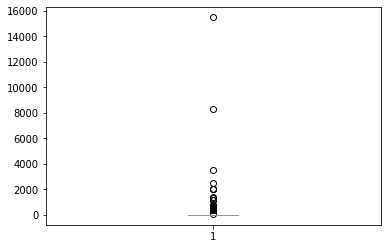

In [35]:
# outlier treatment
plt.boxplot(house['MiscVal'])
Q1 = house['MiscVal'].quantile(0.25)
Q3 = house['MiscVal'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['MiscVal'] >= Q1 - 1.5*IQR) & 
                      (house['MiscVal'] <= Q3 + 1.5*IQR)]
house.shape

(1291, 81)

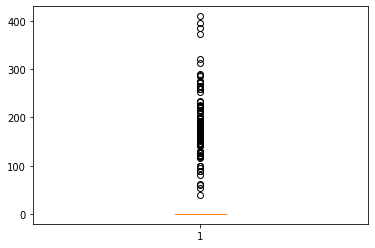

In [36]:
# outlier treatment
plt.boxplot(house['ScreenPorch'])
Q1 = house['ScreenPorch'].quantile(0.25)
Q3 = house['ScreenPorch'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['ScreenPorch'] >= Q1 - 1.5*IQR) & 
                      (house['ScreenPorch'] <= Q3 + 1.5*IQR)]
house.shape

(1234, 81)

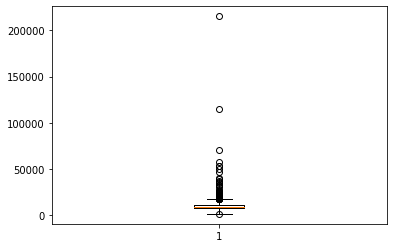

In [37]:
# outlier treatment
plt.boxplot(house['LotArea'])
Q1 = house['LotArea'].quantile(0.25)
Q3 = house['LotArea'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['LotArea'] >= Q1 - 1.5*IQR) & 
                      (house['LotArea'] <= Q3 + 1.5*IQR)]
house.shape

(1157, 81)

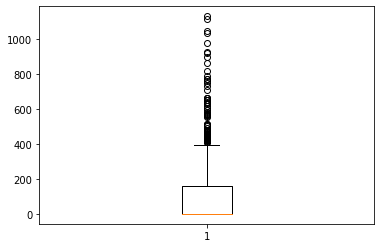

In [38]:
# outlier treatment
plt.boxplot(house['MasVnrArea'])
Q1 = house['MasVnrArea'].quantile(0.25)
Q3 = house['MasVnrArea'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['MasVnrArea'] >= Q1 - 1.5*IQR) & 
                      (house['MasVnrArea'] <= Q3 + 1.5*IQR)]
house.shape

(1135, 81)

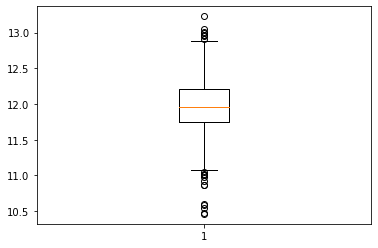

In [39]:
# outlier treatment
plt.boxplot(house['SalePrice'])
Q1 = house['SalePrice'].quantile(0.25)
Q3 = house['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
house = house[(house['SalePrice'] >= Q1 - 1.5*IQR) & 
                      (house['SalePrice'] <= Q3 + 1.5*IQR)]
house.shape

## Checking the Correlation between the variables

In [40]:
# correlation matrix
cor = house_numeric.corr()
cor

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.304522    0.178469    0.214367    0.042463   
LotArea           0.304522  1.000000    0.103321    0.214103    0.111170   
MasVnrArea        0.178469  0.103321    1.000000    0.261256   -0.071330   
BsmtFinSF1        0.214367  0.214103    0.261256    1.000000   -0.050117   
BsmtFinSF2        0.042463  0.111170   -0.071330   -0.050117    1.000000   
BsmtUnfSF         0.124098 -0.002618    0.113862   -0.495251   -0.209294   
TotalBsmtSF       0.363472  0.260833    0.360067    0.522396    0.104810   
1stFlrSF          0.413773  0.299475    0.339850    0.445863    0.097117   
2ndFlrSF          0.072388  0.050986    0.173800   -0.137079   -0.099260   
LowQualFinSF      0.037469  0.004779   -0.068628   -0.064503    0.014807   
GrLivArea         0.368007  0.263116    0.388052    0.208171   -0.009640   
GarageArea        0.323511  0.180403    0.370884    0.296970   -0.018227   
WoodDeckSF        0.075542  0.171698    0.159991    0.204306    0.067898   
OpenPorchSF       0.137014  0.084774    0.122528    0.111761    0.003093   
EnclosedPorch     0.010287 -0.018340   -0.109907   -0.102303    0.036543   
3SsnPorch         0.061945  0.020423    0.019144    0.026451   -0.029993   
ScreenPorch       0.037655  0.043160    0.062248    0.062021    0.088871   
PoolArea          0.180819  0.077672    0.011928    0.140491    0.041709   
MiscVal          -0.000255  0.038068   -0.029512    0.003571    0.004940   
SalePrice         0.334771  0.263843    0.472614    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
LotFrontage     0.124098     0.363472  0.413773  0.072388      0.037469   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779   
MasVnrArea      0.113862     0.360067  0.339850  0.173800     -0.068628   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683   
GarageArea      0.183303     0.486665  0.489782  0.138347     -0.067601   
WoodDeckSF     -0.005316     0.232019  0.235459  0.092165     -0.025444   
OpenPorchSF     0.129005     0.247264  0.211671  0.208026      0.018251   
EnclosedPorch  -0.002538    -0.095478 -0.065292  0.061989      0.061081   
3SsnPorch       0.020764     0.037384  0.056104 -0.024358     -0.004296   
ScreenPorch    -0.012579     0.084489  0.088758  0.040606      0.026799   
PoolArea       -0.035092     0.126053  0.131525  0.081487      0.062157   
MiscVal        -0.023837    -0.018479 -0.021096  0.016197     -0.003793   
SalePrice       0.214479     0.613581  0.605852  0.319334     -0.025606   

               GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
LotFrontage     0.368007    0.323511    0.075542     0.137014       0.010287   
LotArea         0.263116    0.180403    0.171698     0.084774      -0.018340   
MasVnrArea      0.388052    0.370884    0.159991     0.122528      -0.109907   
BsmtFinSF1      0.208171    0.296970    0.204306     0.111761      -0.102303   
BsmtFinSF2     -0.009640   -0.018227    0.067898     0.003093       0.036543   
BsmtUnfSF       0.240257    0.183303   -0.005316     0.129005      -0.002538   
TotalBsmtSF     0.454868    0.486665    0.232019     0.247264      -0.095478   
1stFlrSF        0.566024    0.489782    0.235459     0.211671      -0.065292   
2ndFlrSF        0.687501    0.138347    0.092165     0.208026       0.061989   
LowQualFinSF    0.134683   -0.067601   -0.

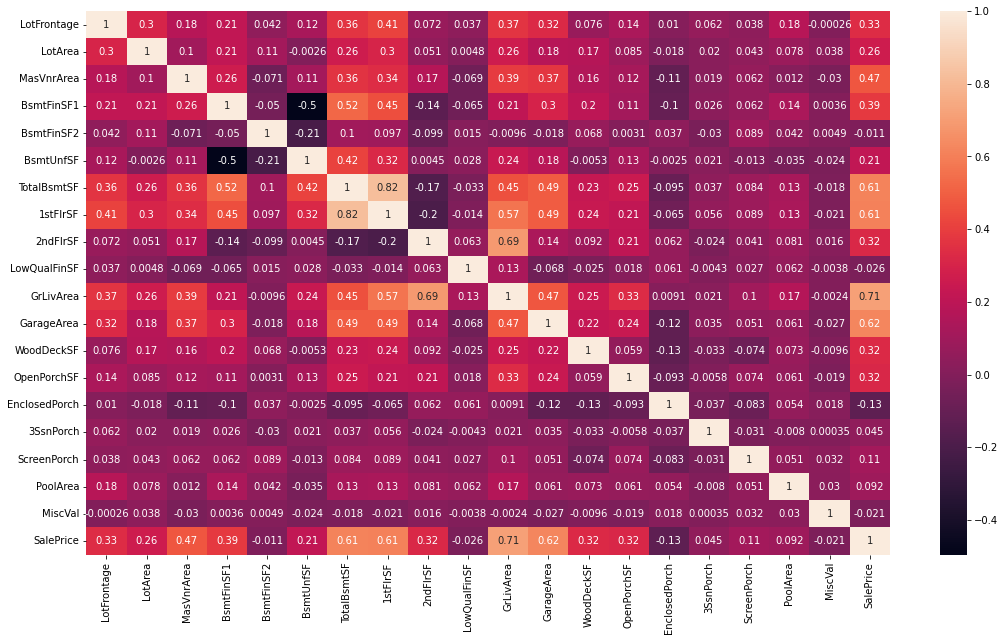

In [41]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(cor, annot=True)
plt.show()

In [42]:
#converting year to number of years
house['YearBuilt'] = 2022 - house['YearBuilt']
house['YearRemodAdd'] = 2022 - house['YearRemodAdd']
house['GarageYrBlt'] = 2022 - house['GarageYrBlt']
house['YrSold'] = 2022 - house['YrSold']

In [43]:
#converting from int type to object to treat the variables as categorical variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['TotRmsAbvGrd'] = house['TotRmsAbvGrd'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')

In [44]:
house.shape

(1135, 81)

In [45]:
final = house

## Data Preparation

## Creating Dummy Variables

In [46]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
final[varlist1] = final[varlist1].apply(binary_map)

In [47]:
# List of variables to map

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
final[varlist2] = final[varlist2].apply(binary_map)

In [48]:
# List of variables to map

varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
final[varlist3] = final[varlist3].apply(binary_map)

In [49]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = final.select_dtypes(include=['object'])
house_categorical.head()


MSSubClass MSZoning Alley LotShape LandContour LotConfig LandSlope  \
0         60       RL  none      Reg         Lvl    Inside       Gtl   
1         20       RL  none      Reg         Lvl       FR2       Gtl   
2         60       RL  none      IR1         Lvl    Inside       Gtl   
3         70       RL  none      IR1         Lvl    Corner       Gtl   
4         60       RL  none      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... GarageFinish GarageCars GarageQual  \
0      CollgCr       Norm       Norm  ...          RFn          2         TA   
1      Veenker      Feedr       Norm  ...          RFn          2         TA   
2      CollgCr       Norm       Norm  ...          RFn          2         TA   
3      Crawfor       Norm       Norm  ...          Unf          3         TA   
4      NoRidge       Norm       Norm  ...          RFn          3         TA   

  GarageCond PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0         TA          Y   none  none        none       WD        Normal  
1         TA          Y   none  none        none       WD        Normal  
2         TA          Y   none  none        none       WD        Normal  
3         TA          Y   none  none        none       WD       Abnorml  
4         TA          Y   none  none        none       WD        Normal  

[5 rows x 52 columns]

In [50]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0  ...               0               0             0             0   
1  ...               0               0             0             0   
2  ...               0               0             0             0   
3  ...               0               0             0             0   
4  ...               0               0             0             0   

   SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0            1                      0                     0   
1            1                      0                     0   
2            1                      0                     0   
3            1                      0                     0   
4            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 271 columns]

In [51]:
# drop categorical variables 
final = final.drop(list(house_categorical.columns), axis=1)

In [52]:
# concat dummy variables with X
final = pd.concat([final, house_dummies], axis=1)

In [53]:
final.shape

(1135, 300)

In [54]:
# Dropping ID Column
final = final.drop(['Id'], axis=1)
final.head()

LotFrontage  LotArea  Street  Utilities  YearBuilt  YearRemodAdd  \
0         65.0     8450       1          1         19            19   
1         80.0     9600       1          1         46            46   
2         68.0    11250       1          1         21            20   
3         60.0     9550       1          1        107            52   
4         84.0    14260       1          1         22            22   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
0       196.0         706           0        150  ...               0   
1         0.0         978           0        284  ...               0   
2       162.0         486           0        434  ...               0   
3         0.0         216           0        540  ...               0   
4       350.0         655           0        490  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 299 columns]

In [55]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 0 to 1459
Columns: 299 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(4), int64(24), uint8(271)
memory usage: 557.5 KB


In [56]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

train,test,= train_test_split(final, train_size=0.7, test_size=0.3, random_state=100)

In [57]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()


In [59]:
cols=train.columns
cols

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=299)

In [60]:
#scaling the train data
train[cols]=scaler.fit_transform(train[cols])

In [61]:
#Scaling the test data
test[cols]=scaler.fit_transform(test[cols])

In [62]:
train.head()

LotFrontage   LotArea  Street  Utilities  YearBuilt  YearRemodAdd  \
758      0.018634  0.051017     1.0        0.0   0.081481      0.183333   
1229     0.304348  0.408704     1.0        0.0   0.370370      0.833333   
334      0.236025  0.480623     1.0        0.0   0.088889      0.200000   
546      0.304348  0.461245     1.0        0.0   0.644444      1.000000   
686      0.391304  0.554638     1.0        0.0   0.022222      0.050000   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
758     0.920716    0.341843         0.0   0.095495  ...             0.0   
1229    0.000000    0.414695         0.0   0.200294  ...             0.0   
334     0.000000    0.515567         0.0   0.056317  ...             0.0   
546     0.000000    0.186800         0.0   0.374633  ...             0.0   
686     0.000000    0.000000         0.0   0.428012  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
758              0.0           0.0           0.0          1.0   
1229             0.0           0.0           0.0          1.0   
334              0.0           0.0           0.0          1.0   
546              0.0           0.0           0.0          1.0   
686              0.0           1.0           0.0          0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
758                     0.0                   0.0                   0.0   
1229                    0.0                   0.0                   0.0   
334                     0.0                   0.0                   0.0   
546                     0.0                   0.0                   0.0   
686                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
758                    1.0                    0.0  
1229                   1.0                    0.0  
334                    1.0                    0.0  
546                    1.0                    0.0  
686                    0.0                    1.0  

[5 rows x 299 columns]

In [63]:
test.head()

LotFrontage   LotArea  Street  Utilities  YearBuilt  YearRemodAdd  \
1179     0.437500  0.426411     1.0        0.0   0.401460      0.932203   
377      0.632812  0.604088     1.0        0.0   0.036496      0.067797   
490      0.375000  0.067641     1.0        0.0   0.240876      0.559322   
408      0.687500  0.794609     1.0        0.0   0.021898      0.050847   
397      0.375000  0.379271     1.0        0.0   0.343066      0.796610   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
1179    0.000000    0.000000         0.0   0.000000  ...             0.0   
377     0.000000    0.000000         0.0   0.877778  ...             0.0   
490     0.000000    0.000000         0.0   0.146667  ...             0.0   
408     0.958904    0.000000         0.0   0.590556  ...             0.0   
397     0.789041    0.333539         0.0   0.180000  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1179             0.0           0.0           0.0          1.0   
377              0.0           0.0           0.0          1.0   
490              0.0           0.0           0.0          1.0   
408              0.0           1.0           0.0          0.0   
397              0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1179                    0.0                   0.0                   0.0   
377                     0.0                   0.0                   0.0   
490                     0.0                   0.0                   0.0   
408                     0.0                   0.0                   0.0   
397                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1179                   1.0                    0.0  
377                    1.0                    0.0  
490                    1.0                    0.0  
408                    0.0                    1.0  
397                    1.0                    0.0  

[5 rows x 299 columns]

In [64]:
y_train = train.pop('SalePrice')
y_train

758     0.557009
1229    0.363130
334     0.595106
546     0.645403
686     0.691252
          ...   
1038    0.211882
69      0.684126
453     0.645403
108     0.307421
1027    0.832489
Name: SalePrice, Length: 794, dtype: float64

In [65]:
X_train=train
X_train

LotFrontage   LotArea  Street  Utilities  YearBuilt  YearRemodAdd  \
758      0.018634  0.051017     1.0        0.0   0.081481      0.183333   
1229     0.304348  0.408704     1.0        0.0   0.370370      0.833333   
334      0.236025  0.480623     1.0        0.0   0.088889      0.200000   
546      0.304348  0.461245     1.0        0.0   0.644444      1.000000   
686      0.391304  0.554638     1.0        0.0   0.022222      0.050000   
...           ...       ...     ...        ...        ...           ...   
1038     0.000000  0.003558     1.0        0.0   0.296296      0.033333   
69       0.372671  0.896823     1.0        0.0   0.422222      0.950000   
453      0.335404  0.477954     1.0        0.0   0.014815      0.033333   
108      0.397516  0.446188     1.0        0.0   0.674074      0.083333   
1027     0.310559  0.510991     1.0        0.0   0.022222      0.033333   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
758     0.920716    0.341843         0.0   0.095495  ...             0.0   
1229    0.000000    0.414695         0.0   0.200294  ...             0.0   
334     0.000000    0.515567         0.0   0.056317  ...             0.0   
546     0.000000    0.186800         0.0   0.374633  ...             0.0   
686     0.000000    0.000000         0.0   0.428012  ...             0.0   
...          ...         ...         ...        ...  ...             ...   
1038    0.000000    0.000000         0.0   0.267385  ...             0.0   
69      0.000000    0.375467         0.0   0.343291  ...             0.0   
453     0.000000    0.000000         0.0   0.376102  ...             0.0   
108     0.000000    0.000000         0.0   0.388345  ...             0.0   
1027    0.864450    0.942092         0.0   0.061214  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
758              0.0           0.0           0.0          1.0   
1229             0.0           0.0           0.0          1.0   
334              0.0           0.0           0.0          1.0   
546              0.0           0.0           0.0          1.0   
686              0.0           1.0           0.0          0.0   
...              ...           ...           ...          ...   
1038             0.0           0.0           0.0          1.0   
69               0.0           0.0           0.0          1.0   
453              0.0           0.0           0.0          1.0   
108              0.0           0.0           0.0          1.0   
1027             0.0           1.0           0.0          0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
758                     0.0                   0.0                   0.0   
1229                    0.0                   0.0                   0.0   
334                     0.0                   0.0                   0.0   
546                     0.0                   0.0                   0.0   
686                     0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1038                    0.0                   0.0                   0.0   
69                      0.0                   0.0                   0.0   
453                     0.0                   0.0                   0.0   
108                     0.0                   0.0                   0.0   
1027                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
758                    1.0                    0.0  
1229                   1.0                    0.0  
334                    1.0                    0.0  
546                    1.0                    0.0  
686                    0.0                    1.0  
...                    ...                    ...  
1038                   1.0                    0.0  
69                     1.0                    0.0  
453                    1.0                

In [66]:
y_test = test.pop('SalePrice')
y_test

1179    0.207126
377     0.940890
490     0.327312
408     0.830993
397     0.546884
          ...   
1389    0.401045
1097    0.548551
1187    0.793383
202     0.312350
429     0.564959
Name: SalePrice, Length: 341, dtype: float64

In [67]:
X_test=test
X_test

LotFrontage   LotArea  Street  Utilities  YearBuilt  YearRemodAdd  \
1179     0.437500  0.426411     1.0        0.0   0.401460      0.932203   
377      0.632812  0.604088     1.0        0.0   0.036496      0.067797   
490      0.375000  0.067641     1.0        0.0   0.240876      0.559322   
408      0.687500  0.794609     1.0        0.0   0.021898      0.050847   
397      0.375000  0.379271     1.0        0.0   0.343066      0.796610   
...           ...       ...     ...        ...        ...           ...   
1389     0.304688  0.278664     1.0        0.0   0.496350      1.000000   
1097     0.375000  0.132878     1.0        0.0   0.167883      0.389831   
1187     0.531250  0.687484     1.0        0.0   0.109489      0.237288   
202      0.226562  0.341939     1.0        0.0   0.620438      1.000000   
429      0.851562  0.623956     1.0        0.0   0.153285      0.355932   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
1179    0.000000    0.000000         0.0   0.000000  ...             0.0   
377     0.000000    0.000000         0.0   0.877778  ...             0.0   
490     0.000000    0.000000         0.0   0.146667  ...             0.0   
408     0.958904    0.000000         0.0   0.590556  ...             0.0   
397     0.789041    0.333539         0.0   0.180000  ...             0.0   
...          ...         ...         ...        ...  ...             ...   
1389    0.000000    0.231624         0.0   0.200000  ...             0.0   
1097    0.000000    0.000000         0.0   0.596667  ...             0.0   
1187    0.000000    0.899321         0.0   0.093333  ...             0.0   
202     0.000000    0.381099         0.0   0.000000  ...             0.0   
429     0.000000    0.620754         0.0   0.215000  ...             0.0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
1179             0.0           0.0           0.0          1.0   
377              0.0           0.0           0.0          1.0   
490              0.0           0.0           0.0          1.0   
408              0.0           1.0           0.0          0.0   
397              0.0           0.0           0.0          1.0   
...              ...           ...           ...          ...   
1389             0.0           0.0           0.0          1.0   
1097             0.0           0.0           0.0          1.0   
1187             0.0           0.0           0.0          1.0   
202              0.0           0.0           0.0          0.0   
429              0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
1179                    0.0                   0.0                   0.0   
377                     0.0                   0.0                   0.0   
490                     0.0                   0.0                   0.0   
408                     0.0                   0.0                   0.0   
397                     0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1389                    0.0                   0.0                   0.0   
1097                    0.0                   0.0                   0.0   
1187                    0.0                   0.0                   0.0   
202                     0.0                   0.0                   0.0   
429                     0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
1179                   1.0                    0.0  
377                    1.0                    0.0  
490                    1.0                    0.0  
408                    0.0                    1.0  
397                    1.0                    0.0  
...                    ...                    ...  
1389                   1.0                    0.0  
1097                   1.0                    0.0  
1187                   1.0                

## 4. Model Building and Evaluation

## Linear ,Ridge and Lasso Regression

Let's now try predicting house prices, using linear, ridge and lasso regression.

## Linear  Regression with RFE 

In [68]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=10)             # running RFE
#rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [69]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 265),
 ('LotArea', False, 110),
 ('Street', False, 143),
 ('Utilities', False, 97),
 ('YearBuilt', False, 53),
 ('YearRemodAdd', False, 71),
 ('MasVnrArea', False, 243),
 ('BsmtFinSF1', False, 2),
 ('BsmtFinSF2', False, 51),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 198),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 11),
 ('GrLivArea', True, 1),
 ('GarageYrBlt', False, 176),
 ('GarageArea', False, 235),
 ('WoodDeckSF', False, 148),
 ('OpenPorchSF', False, 193),
 ('EnclosedPorch', False, 166),
 ('3SsnPorch', False, 146),
 ('ScreenPorch', False, 48),
 ('PoolArea', False, 56),
 ('MiscVal', False, 52),
 ('MoSold', False, 238),
 ('YrSold', False, 279),
 ('MSSubClass_30', False, 240),
 ('MSSubClass_40', False, 115),
 ('MSSubClass_45', False, 136),
 ('MSSubClass_50', False, 231),
 ('MSSubClass_60', False, 187),
 ('MSSubClass_70', False, 246),
 ('MSSubClass_75', False, 131),
 ('MSSubClass_80', False, 86),
 (

In [70]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'Exterior1st_CBlock', 'BsmtCond_Po', 'Electrical_Mix', 'BedroomAbvGr_5',
       'KitchenAbvGr_2', 'KitchenAbvGr_3'],
      dtype='object')

In [71]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [72]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe)

# fit
lm_model=lm.fit()

# params
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.15e-198
Time:                        22:30:52   Log-Likelihood:                 655.17
No. Observations:                 794   AIC:                            -1290.
Df Residuals:                     784   BIC:                            -1244.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0481      0.013      3.797      0.000       0.023       0.073
TotalBsmtSF            0.6145      0.053     11.549      0.000       0.510       0.719
1stFlrSF               0.9830      0.196      5.005      0.000       0.597       1.368
2ndFlrSF               0.6627      0.128      5.188      0.000       0.412       0.913
GrLivArea             -0.4034      0.226     -1.785      0.075      -0.847       0.040
Exterior1st_CBlock    -0.1979      0.107     -1.852      0.064      -0.408       0.012
BsmtCond_Po           -0.1958      0.053     -3.667      0.000      -0.301      -0.091
Electrical_Mix        -0.1958      0.053     -3.667      0.000      -0.301      -0.091
BedroomAbvGr_5        -0.1473      0.030     -4.901      0.000      -0.206      -0.088
KitchenAbvGr_2        -0.1879      0.018    -10.269      0.000      -0.224      -0.152
KitchenAbvGr_3        -0.2793      0.076     -3.687      0.000      -0.428      -0.131
==============================================================================
Omnibus:                       44.768   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.358
Skew:                          -0.475   Prob(JB):                     1.75e-14
Kurtosis:                       4.006   Cond. No.                     3.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
vif=pd.DataFrame()
vif["features"]=X_train_rfe.columns
vif["VIF"]=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif["VIF"]= round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif
      

features    VIF
6          BsmtCond_Po    inf
7       Electrical_Mix    inf
4            GrLivArea  91.30
3             2ndFlrSF  75.72
2             1stFlrSF  51.79
0                const  11.18
1          TotalBsmtSF   2.72
8       BedroomAbvGr_5   1.09
9       KitchenAbvGr_2   1.09
10      KitchenAbvGr_3   1.01
5   Exterior1st_CBlock   1.00

In [74]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]

In [75]:
# Adding constant variable to test dataframe
X_test_rfe = sm.add_constant(X_test_rfe)

In [76]:
# calculating the r-squared value for train data
print(metrics.r2_score(y_true=y_train, y_pred=lm_model.predict(X_train_rfe)))

0.7000223934539381


In [77]:
# calculating the r-squared value for test data
print(metrics.r2_score(y_true=y_test, y_pred=lm_model.predict(X_test_rfe)))

0.5458562714844307


In [78]:
# Check the mean squared error

mean_squared_error(y_test, lm_model.predict(X_test_rfe))

0.017156551668994234

### Since the R squared value of linear regression model good for train data and is very low for test data it clearly shows the case of overfitting.
### our model is not good enough to predict the price of houses

In [79]:
param = pd.DataFrame(lm_model.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

Variables  Coefficient value
index                                       
2                1stFlrSF           0.982953
3                2ndFlrSF           0.662674
1             TotalBsmtSF           0.614502
0                   const           0.048076
8          BedroomAbvGr_5          -0.147261
9          KitchenAbvGr_2          -0.187884
7          Electrical_Mix          -0.195845
6             BsmtCond_Po          -0.195845
5      Exterior1st_CBlock          -0.197862
10         KitchenAbvGr_3          -0.279316
4               GrLivArea          -0.403375

## Ridge Regression

In [80]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.04105101146517161


In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.015814      0.004954         0.005919        0.001398     0.00001   
1        0.015747      0.002177         0.005013        0.000011      0.0001   
2        0.014615      0.001286         0.005021        0.000017       0.001   
3        0.014323      0.000831         0.003141        0.002576        0.01   
4        0.013915      0.001015         0.005599        0.000848        0.05   
5        0.014111      0.000892         0.003953        0.001982         0.1   
6        0.013197      0.001840         0.005780        0.001521         0.2   
7        0.014294      0.000989         0.005016        0.000008         0.3   
8        0.013826      0.002144         0.005689        0.001347         0.4   
9        0.015482      0.001538         0.005020        0.000010         0.5   
10       0.014277      0.000867         0.003860        0.001953         0.6   
11       0.012525      0.002134         0.005010        0.003162         0.7   
12       0.015002      0.000604         0.005016        0.000013         0.8   
13       0.013505      0.001845         0.004265        0.002185         0.9   
14       0.013699      0.001916         0.005714        0.001382         1.0   
15       0.012651      0.002259         0.004911        0.003167         2.0   
16       0.012177      0.002715         0.006013        0.002001         3.0   
17       0.012726      0.002277         0.006006        0.001996         4.0   
18       0.012501      0.002123         0.006015        0.001993         5.0   
19       0.013954      0.001044         0.003162        0.002595         6.0   
20       0.012631      0.002307         0.005798        0.003561         7.0   
21       0.012789      0.002293         0.007008        0.002443         8.0   
22       0.013821      0.000759         0.005207        0.000370         9.0   
23       0.012651      0.002262         0.006017        0.001990        10.0   
24       0.013023      0.001865         0.003011        0.002458          20   
25       0.014300      0.000911         0.005013        0.000011          50   
26       0.014409      0.000866         0.005366        0.000479         100   
27       0.012778      0.001636         0.005203        0.000368         500   
28       0.011895      0.002494         0.005964        0.001587        1000   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.049628          -0.047154   
1   {'alpha': 0.0001}          -0.049613          -0.047139   
2    {'alpha': 0.001}          -0.049473          -0.047045   
3     {'alpha': 0.01}          -0.048524          -0.046361   
4     {'alpha': 0.05}          -0.047335          -0.045308   
5      {'alpha': 0.1}          -0.046696          -0.044399   
6      {'alpha': 0.2}          -0.045892          -0.043221   
7      {'alpha': 0.3}          -0.045404          -0.042360   
8      {'alpha': 0.4}          -0.045069          -0.041792   
9      {'alpha': 0.5}          -0.044836          -0.041480   
10     {'alpha': 0.6}          -0.044722          -0.041219   
11     {'alpha': 0.7}          -0.044635          -0.040997   
12     {'alpha': 0.8}          -0.044556          -0.040817   
13     {'alpha': 0.9}          -0.044483          -0.040656   
14     {'alpha': 1.0}          -0.044434          -0.040510   
15     {'alpha': 2.0}          -0.044289          -0.040069   
16     {'alpha': 3.0}          -0.044204          -0.040160   
17     {'alpha': 4.0}          -0.044219          -0.040310   
18     {'alpha': 5.0}          -0.044270          -0.040462   
19     {'alpha': 6.0}          -0.044411          -0.040644   
20     {'alpha': 7.0}          -0.044712          -0.040887   
21     {'alpha': 8.0}          -0.045022          -0.041144   
22     {'alpha': 9.0}          -0.045311          -0.041375   
23    {'alpha': 10.0}          -0.045613          -0.041588   
24      {'alpha': 20}       

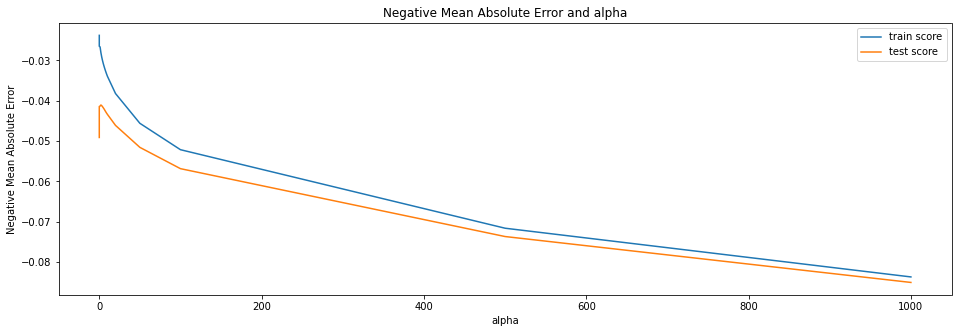

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [84]:
#Finding the coefficient values for alpha=2
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.28648293e-03,  7.03459955e-02, -1.25503641e-02,  0.00000000e+00,
       -9.95533175e-02, -5.47041583e-02,  6.21290429e-03,  8.22739256e-02,
        3.80301599e-02,  4.09821374e-02,  8.48015923e-02,  2.57736783e-02,
        1.01873819e-01,  1.04123074e-01,  1.55518194e-02,  1.46775272e-01,
       -5.34115447e-03,  4.47350060e-02,  3.46078967e-02,  2.43826161e-02,
        7.52990126e-03,  2.24951940e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  7.77860114e-03,  3.57981917e-03, -2.00067436e-02,
        5.65239961e-03,  3.17840560e-03, -2.37597246e-03, -1.32566806e-02,
        1.52754362e-02,  4.34919242e-04, -2.35229982e-02,  1.42975243e-03,
       -1.33845938e-02,  5.87546853e-03, -4.76517214e-02, -5.02335574e-03,
       -8.87918713e-03,  1.89924860e-02,  1.37005113e-02,  3.60672882e-02,
        2.34241354e-02,  1.43076035e-02, -9.38449426e-03,  1.27969838e-02,
       -2.76457968e-03,  1.12488410e-03,  1.25954093e-02, -2.71746151e-02,
       -4.06143066e-03,  

In [85]:
#lets predict the R-squared value of train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9574508387432058


In [86]:
#lets predict the R-squared value of test data
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8936398830073183


In [87]:
# Check the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))

0.004018051396789588

In [88]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df["Coefficient_absolute_value"]=ridge_df["Coefficient"].abs()
# Rearranging the features according to the absolute values of coefficients
ridge_df.sort_values(by=['Coefficient_absolute_value'], ascending=False).head(10)

Features  Coefficient  Coefficient_absolute_value
15              GrLivArea       0.1468                      0.1468
13               2ndFlrSF       0.1041                      0.1041
12               1stFlrSF       0.1019                      0.1019
4               YearBuilt      -0.0996                      0.0996
114         OverallCond_3      -0.0859                      0.0859
10            TotalBsmtSF       0.0848                      0.0848
7              BsmtFinSF1       0.0823                      0.0823
112         OverallQual_9       0.0719                      0.0719
1                 LotArea       0.0703                      0.0703
80   Neighborhood_StoneBr       0.0652                      0.0652

In [89]:
# Separating the top 10 features which determine the price of houses
ridge_top_10_features=ridge_df.sort_values(by=['Coefficient_absolute_value'], ascending=False).head(10)

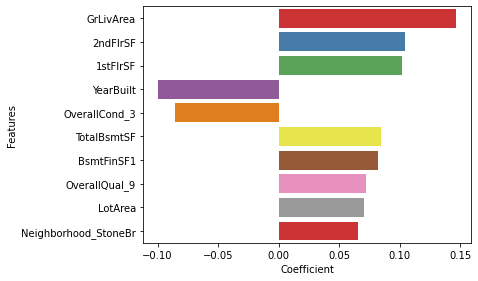

In [90]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = ridge_top_10_features)
plt.show()

## Conclusion (Ridge Regression):
### According to the Ridge Regression model top 5 features which affect the price of the houses are:

#### 1. GrLivArea: Above grade (ground) living area square feet
#### 2. 1stFlrSF: First Floor square feet
#### 3. 2ndFlrSF: Second floor square feet
#### 4. YearBuilt: Number of years from original construction date to present year
#### 5. OverallCond: Rates the overall condition of the house

## Lasso Regression

In [91]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1       0.0001         -0.028018        -0.039325                1
2        0.001         -0.039953        -0.044690                2
0      0.00001         -0.024604        -0.044885                3
3         0.01         -0.079219        -0.082076                4
4         0.05         -0.138558        -0.138943                5
26         100         -0.156196        -0.156244                6
25          50         -0.156196        -0.156244                6
24          20         -0.156196        -0.156244                6
23        10.0         -0.156196        -0.156244                6
22         9.0         -0.156196        -0.156244                6
21         8.0         -0.156196        -0.156244                6
20         7.0         -0.156196        -0.156244                6
19         6.0         -0.156196        -0.156244                6
18         5.0         -0.156196        -0.156244                6
17         4.0         -0.156196        -0.156244                6
16         3.0         -0.156196        -0.156244                6
14         1.0         -0.156196        -0.156244                6
27         500         -0.156196        -0.156244                6
13         0.9         -0.156196        -0.156244                6
12         0.8         -0.156196        -0.156244                6
11         0.7         -0.156196        -0.156244                6
10         0.6         -0.156196        -0.156244                6
9          0.5         -0.156196        -0.156244                6
8          0.4         -0.156196        -0.156244                6
7          0.3         -0.156196        -0.156244                6
6          0.2         -0.156196        -0.156244                6
5          0.1         -0.156196        -0.156244                6
15         2.0         -0.156196        -0.156244                6
28        1000         -0.156196        -0.156244                6

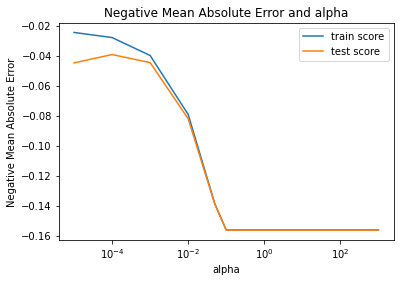

In [93]:
# plotting mean test and train scoes with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

# plotting
# since the alpha is spread over large values taking x-axis as log scale
plt.xscale("log")
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [94]:
# get the best estimator for lambda

lasso_model_cv.best_params_

{'alpha': 0.0001}

In [95]:
# check the coefficient values with lambda = 0.0001

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.00000000e+00,  6.12188411e-02, -0.00000000e+00,  0.00000000e+00,
       -1.66064063e-01, -5.20636468e-02,  3.40829305e-04,  5.50572572e-02,
        2.90479790e-02,  0.00000000e+00,  1.62532580e-01,  1.98444525e-02,
        0.00000000e+00,  4.81238607e-02, -0.00000000e+00,  3.67120058e-01,
       -0.00000000e+00,  5.37115935e-02,  3.22605437e-02,  2.09024519e-02,
        1.30607501e-02,  1.92257741e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.39495360e-03,  1.86148633e-03, -9.93500053e-03,
        0.00000000e+00,  2.28525963e-03, -0.00000000e+00, -1.30272428e-02,
        1.96534467e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.67432894e-02,  0.00000000e+00, -5.41932088e-02, -0.00000000e+00,
       -3.09077286e-03,  0.00000000e+00,  0.00000000e+00,  1.92535806e-02,
        2.58379098e-03,  1.09149749e-02, -5.41178487e-03,  4.71748845e-03,
       -0.00000000e+00,  0.00000000e+00,  1.13330649e-02, -2.56683034e-02,
       -3.74118359e-03,  

In [96]:
#lets predict the R-squared value of train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9568181403305862


In [97]:
#lets predict the R-squared value of test data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8761350947069333


In [98]:
# Check the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

0.004679343816068399

In [99]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df["Coefficient_absolute_value"]=lasso_df["Coefficient"].abs()
# Rearranging the features according to the absolute values of coefficients
lasso_df.sort_values(by=['Coefficient_absolute_value'], ascending=False).head(10)

Features  Coefficient  Coefficient_absolute_value
15              GrLivArea       0.3671                      0.3671
4               YearBuilt      -0.1661                      0.1661
10            TotalBsmtSF       0.1625                      0.1625
114         OverallCond_3      -0.1041                      0.1041
112         OverallQual_9       0.0865                      0.0865
241       Functional_Maj2      -0.0777                      0.0777
68   Neighborhood_MeadowV      -0.0752                      0.0752
80   Neighborhood_StoneBr       0.0729                      0.0729
86        Condition1_PosN       0.0673                      0.0673
111         OverallQual_8       0.0633                      0.0633

In [100]:
# Separating the top 10 features which determine the price of houses
lasso_top_10_features=lasso_df.sort_values(by=['Coefficient_absolute_value'], ascending=False).head(10)

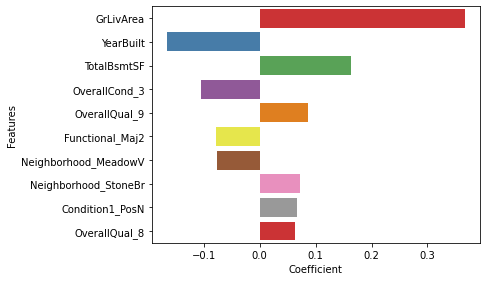

In [101]:
# bar plot to determine the variables that would affect pricing most using Lasso regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_top_10_features)
plt.show()

## Conclusion (Lasso Regression):
### According to the Lasso Regression model top 5 features which affect the price of the houses are:

#### 1. GrLivArea: Above grade (ground) living area square feet
#### 2. YearBuilt: Number of years from original construction date to present year
#### 3. TotalBsmtSF: Total square feet of basement area
#### 4. OverallCond: Rates the overall condition of the house
#### 5. OverallQual: Rates the overall material and finish of the house

## How well Model describe the price of a house.

### The R-squared value on the test data for Ridge and Lasso Regression are given below

#### Ridge - 0.893
#### Lasso - 0.876

#### Since we have decent value of R squared our models can very well predict the price of houses
#### the difference in the r squared values of train and test data is not much so we can say that issue of overfitting is resolved.

The optimal lambda value in case of Ridge and Lasso Regression are below:

Ridge - 2.0 <br>
Lasso - 0.0001 <br>

___Since Lasso helps in feature reduction, It is preferrable over Ridge.___
